In [25]:
#importing Libraries
import cv2

cam = cv2.VideoCapture(0)

count = 0

while True:
    ret, img = cam.read()

    cv2.imshow("Test", img)

    if not ret:
        break

    k=cv2.waitKey(1)

    if k%256==27:
        #For Esc key
        print("Close")
        break
    elif k%256==32:
        #For Space key
        print("Image "+str(count)+"saved")
        file='C:/Users/Atharva Kasodekar/Desktop/Projects/Image_Authentication/code'+str(count)+'.jpg'
        cv2.imwrite(file, img)
        count +=1

cam.release
cv2.destroyAllWindows

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import filters
%matplotlib inline
from skimage.io import imread, imshow

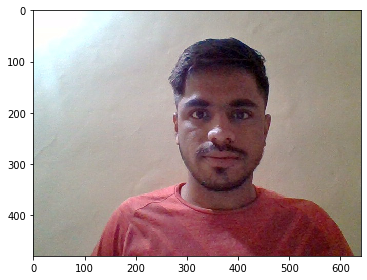

In [5]:
image1 = imread('code0.jpg')
imshow(image1);


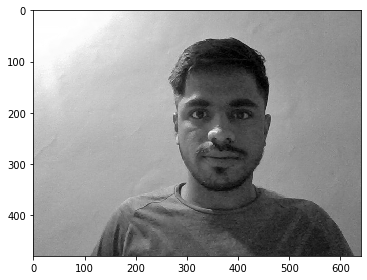

In [6]:
image2 = imread('code0.jpg', as_gray=True)
imshow(image2);

In [7]:
print(image1.shape)
print(image2.shape)

(480, 640, 3)
(480, 640)


In [8]:
print(image1.size)
print(image2.size)

921600
307200


In [9]:
pixel_feat1 = np.reshape(image2, (480*640))
pixel_feat1

array([0.99438902, 0.99438902, 0.99438902, ..., 0.46575176, 0.45255059,
       0.44554078])

In [10]:
pixel_feat2 = np.reshape(image1, (480*640*3))
pixel_feat2

array([255, 253, 255, ..., 121, 114,  88], dtype=uint8)

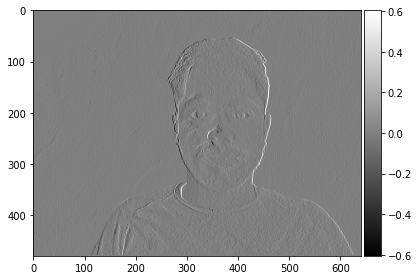

In [11]:
from skimage import feature
# prewitt kernel
pre_hor = skimage.filters.prewitt_h(image2)
pre_ver = skimage.filters.prewitt_v(image2)

# Sobel Kernel
ed_sobel = filters.sobel(image2)

#canny algorithm
can = feature.canny(image2)

imshow(pre_ver, cmap='gray');

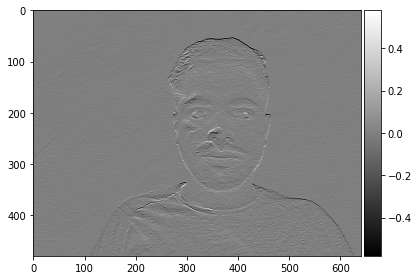

In [12]:
imshow(pre_hor, cmap='gray');

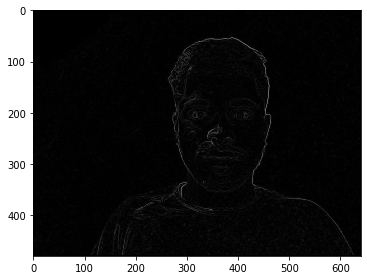

In [14]:
imshow(ed_sobel, cmap='gray');

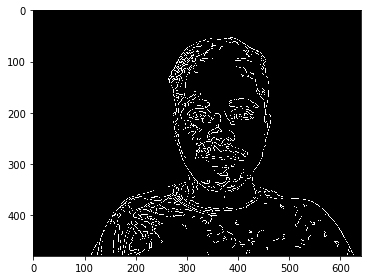

In [15]:
imshow(can, cmap='gray')

Text(0.5, 1.0, 'histogram of gray values')

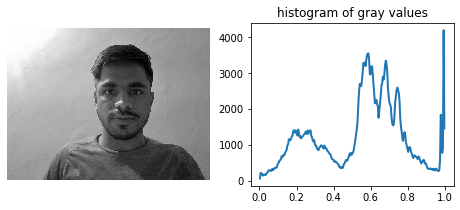

In [16]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image2)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image2, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [17]:
from PIL import Image
from numpy import array
im_1 = Image.open(r"code0.jpg")
ar = array(im_1)
ar

array([[[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [142, 138, 111],
        [141, 137, 110],
        [140, 136, 109]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [142, 138, 111],
        [141, 137, 110],
        [139, 135, 108]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [143, 139, 112],
        [141, 137, 110],
        [139, 135, 108]],

       ...,

       [[147, 151, 134],
        [144, 148, 131],
        [142, 146, 129],
        ...,
        [119, 117,  96],
        [121, 116,  94],
        [124, 116,  93]],

       [[149, 152, 135],
        [146, 150, 133],
        [146, 150, 133],
        ...,
        [121, 119,  96],
        [122, 116,  92],
        [122, 115,  89]],

       [[148, 151, 132],
        [148, 151, 132],
        [149, 153, 136],
        ...,
        [122, 120,  97],
        [122, 116,  90],
        [121, 114,  88]]